# **Task1**

![sort](task1.jpg)

Link for the pic if it didnt work:
https://drive.google.com/file/d/17SJrJNYXsHhIGTishglLSTZDsLg3h7VP/view?usp=sharing

# **Task2-Counting Bloom Filter**

**Introduction**

Before discussing Counting Bloom Filters, we need to understand first the standard Bloom Filter data structure and how CBF extends it in some properties. Bloom Filter is a space-efficient probabilistic data structure that tests element's membership for a specific set, then return "possibly a member of the set" or "not a member of the set." With its probabilistic nature, BF allows false-positive matches where it may return that an element is in the set, but in reality, it's not. 

Instead of testing for the element membership, CBF tests if the count number of an element is smaller than its specific threshold in a given set. CPF either returns that the count number "might be equal to or bigger than the threshold" or "is 100% smaller than the threshold."

**Basic Operations**

**Initialization:**
CBF starts with an empty bloom filter array with m number of counters, all set to zero. CPF has a k-number of hash functions that maps the inputted elements to different counters. Similar to the standard BF, k and m are determined to achieve the desirable false positive rate in the set. 

**Inserting:**
All elements need to be passed through k-number of hash functions. Hash functions hash/map each element to specific counter positions to be incremented by 1.

**Searching:**
To look-up for an element in a list, pass it in all k-number of hash functions, which output the counter positions to search in them.
a. If ALL outputted counters are bigger than or equal to the element's threshold, then the count is EITHER  bigger than or equal to the theta, OR  a false positive where the element count is smaller than the threshold.
b. If ANY outputted counters are less than the element's threshold, then the count number of the inputted element is DEFINITELY less than the threshold.

**Removing:**
Unlike the standard BF that doesn't allow removing elements, CBF allows removing elements from the list by decrementing the elements' associated counters. However, due to the probabilistic nature of BF of false positive, we can delete elements that were never added into the filter. 

**Computational Applications**

As an extension to the Bloom Filter, CBF is useful in most of the standard BF computational applications and more. With its improved insertion and deletion qualities, CBF can work with dynamic sets that can be frequently updated by the user.

With its efficient way of filtering lists and querying for elements, CBFs is used to filter users' login information on different websites. When a  user enters his/her account information, CBFs can verify if the account exists in the database or not. If the information doesn't exist, then the user is asked to enter a valid account or create a new one (insertion property). If there is a possibility that the account exists, the user is asked to provide further information like a password to verify the existence of the account and reduce the chance for false positive.

CBFs are used for improving large-scale data processing for dynamic sets. Instead of storing the actual data, CBFs hash them and start doing basic operations of look-ups and insertion for keys instead of the data.

CBFs can be used for movies and stories recommendation as in Netflix. CBFs can look-up for movies that the user has watched more than a  specific theta, or can filter some movies that users don't frequently open or watch.

Search Engine can use CBFs to check if a particular website exists in the database or not, or even use it to determine websites with frequent visits bigger than or equal to theta. CBFs outperform BFs here as it allows the search engine to update or delete items from the list.

# **Task3-CBF Python Implementation**

In [1]:
import math 
import mmh3 
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline


class CBF:
         
#According to the Wikipedia site, the length of the bit array m can 
#be calculated from the user desirable false positive probability. 
#Thus, I am using the standard BF's rules of calculating m for my class
#I have also specified a function at the end to calculate the real
#false positive probability for CBF based on m,n,k calculated from the user input.


    def __init__(self, n, p, theta):
    
        m= int(-(n * math.log(p))/(math.log(2)**2))  
        k= int((m/n)*math.log(2))
              
        self.threshold=theta
        self.length=m
        self.element_number = n
        self.hash_number = k
#intializing a list of counters 
        self.count_list = [0]*m  
#a list to check if there are elements in the index-position or it's empty 
        self.binary_list = [0]*m 
        
    def insert(self, item):
        for i in range(self.hash_number):
#using mmh3 as hash function and % by m of the list to find the right index
            ind = mmh3.hash(item, i) % self.length
#incrementing the count list by 1,while setting the binary list to 1 all the time 
#if the list index position contains element at any time
            self.count_list[ind] += 1
            self.binary_list[ind] = 1  
            
            
    def search(self, item):
        for i in range(self.hash_number):
            ind = mmh3.hash(item, i) % self.length 
#if the index position is empty return false
#if the index position is full but with less count number than threshold
#return false too. 
            if (self.binary_list[ind]==0):
                return False
            if (self.binary_list[ind]==1) and (self.count_list[ind] < self.threshold):
                return False
        return True
    
    def delete(self, item):
        for i in range(self.hash_number):
            ind = mmh3.hash(item, i) % self.length
#if the index position is not empty, decrement 1
            if self.binary_list[ind]> 0:
                self.count_list[ind] -= 1
            else:
                print("the item doesn't exist in the list")

#Here, I used the Wikipedia equation of calculating the false positive prob for CBF
#This is the FP probability that CBF should achieve if all the parameters are right
#and the hashtables are independent and uniform. 
    def CBF_prob(self):
        binomial_sum=0
        for i in range(self.threshold):
            binomial_sum = sts.binom.pmf(i, self.hash_number*self.element_number, (1/self.length))
        prob= (1-binomial_sum)**self.hash_number
        return round(prob,2)

Proper implementation of CBF needs to have independent and uniformly distributed hash functions to make insertion uniform and random. We want our hash functions to minimize collisions as possible and distribute n over m in a uniform way. The best approach to decide which hash function to use is to test:

1- The hashing speed by creating random inputs and comparing the hashing speed of these functions.

2- Using basic statistics to calculate the distribution of items in the list with each hash function. 

Likely, Hannes-k did these tests on github document to conclude that "cryptographic hash functions offer the most consistent uniform distribution but are slightly more expensive to compute, and the best compromise between speed and uniformity is Murmur 3 hash function."

For this assignment, I have used an already built python hash function that was designed for general hash-based look-up based on multiply and rotate operations. For every k-hash function, I changed the seed for mmh3 to get consistent hash functions for my algorithm.

https://github.com/Baqend/Orestes-Bloomfilter#hash-functions
![table](table.jpg)

Link for the pic if it didnt work:
https://drive.google.com/file/d/18vzVFj-OpJvS5m2YgtImjRMlabMTdZmj/view?usp=sharing

In [2]:
#Test_Code with theta 1
from random import shuffle 

n = 10 #no of items to add 
p = 0.05 #false positive probability 
theta=1 #threshold


countbf = CBF(n,p,theta) 
print("The size of the bit array:", countbf.length) 
print("Number of hash functions:",countbf.hash_number) 
print("CBF Real False Prob=",countbf.CBF_prob())



word_added = ['broccoflower','broccoli ','broccoli','cabbage', 'cabbage',
              'onion','shallot','parsley','endive','oregano'] 


not_word_added  = ['white','yellow','blue','red','green', 
                   'black','brown','purple','lime','khaki'] 

#insert_items
for item in word_added: 
    countbf.insert(item) 


all_words = word_added + not_word_added 
shuffle(all_words)

for i in all_words: 
    if countbf.search(i): 
        if i in not_word_added: 
            print(i,"is a false positive") 
        else: 
            print(i,"is possibly present") 
    else: 
        print(i," is not present") 

The size of the bit array: 62
Number of hash functions: 4
CBF Real False Prob= 0.05
shallot is possibly present
black  is not present
red  is not present
broccoflower is possibly present
endive is possibly present
broccoli  is possibly present
purple  is not present
cabbage is possibly present
green  is not present
onion is possibly present
oregano is possibly present
brown  is not present
blue  is not present
lime  is not present
broccoli is possibly present
cabbage is possibly present
khaki  is not present
white  is not present
yellow  is not present
parsley is possibly present


"brown" word is a false positive in this case. The other results normally reflect the properties of the bloom filter. 

In [3]:
#Test_Code with theta 2
from random import shuffle 

n = 10 #no of items to add 
p = 0.05 #false positive probability 
theta=2 #threshold


countbf = CBF(n,p,theta) 
print("The size of the bit array:", countbf.length) 
print("Number of hash functions:",countbf.hash_number) 
print("CBF Real False Prob=",countbf.CBF_prob())



word_added = ['broccoflower','broccoli ','broccoli','cabbage', 'cabbage',
              'onion','shallot','parsley','endive','oregano'] 


not_word_added  = ['white','yellow','blue','red','green', 
                   'black','brown','purple','lime','khaki'] 



all_words = word_added + not_word_added 
shuffle(all_words)

for item in word_added: 
    countbf.insert(item) 


for i in all_words: 
    if countbf.search(i): 
        if i in not_word_added: 
            print(i,"is a false positive") 
        else: 
            print(i,"probably has a counter greater or equal to θ.") 
    else: 
        print(i," has count number definitely less than θ") 

The size of the bit array: 62
Number of hash functions: 4
CBF Real False Prob= 0.19
yellow  has count number definitely less than θ
oregano  has count number definitely less than θ
cabbage probably has a counter greater or equal to θ.
white  has count number definitely less than θ
blue  has count number definitely less than θ
shallot  has count number definitely less than θ
green  has count number definitely less than θ
khaki  has count number definitely less than θ
lime  has count number definitely less than θ
broccoli  has count number definitely less than θ
onion  has count number definitely less than θ
purple  has count number definitely less than θ
red  has count number definitely less than θ
brown  has count number definitely less than θ
black  has count number definitely less than θ
broccoli   has count number definitely less than θ
broccoflower  has count number definitely less than θ
cabbage probably has a counter greater or equal to θ.
parsley  has count number definitely les

Search function in CBF tests whether the count number of a word is smaller than theta. As I fixed the theta to 2, any word with less than two will have a false in the search function with a messege of "count number of element is definitely less than θ"

In [4]:
#testing the delete function, which have deleted the 
#word 'cabbage' in the second example

countbf.insert('cabbage')
if countbf.search('cabbage'):
    print("cabbage","probably has a counter greater or equal to θ.")
else:
    print("cabbage"," has count number definitely less than θ") 
    
countbf.delete('cabbage')
if countbf.search('cabbage'):
    print("cabbage","probably has a counter greater or equal to θ.")
else:
    print("cabbage"," has count number definitely less than θ") 

cabbage probably has a counter greater or equal to θ.
cabbage probably has a counter greater or equal to θ.


# **Task4.1 CBF Theoretical Analysis**

![table](pic1.JPG)

![table](pic2.JPG)

link for the analysis if it didn't work:
https://drive.google.com/file/d/17JkfXzmRUVAI3H5ukonuf2B_z_lcJyfU/view?usp=sharing
https://drive.google.com/file/d/17pEGWyWTCCw8aREfFCDUkxjVOYTueobr/view?usp=sharing

# **Task4.2 CBF Experimental Analysis**

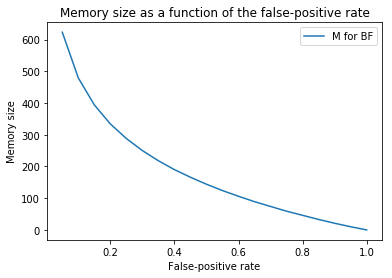

In [5]:
#Memory size as a function of the false-positive rate# 

prop_storage=[]
length_storage=[]
CBF_prop_storage=[]
for i in range(1,21):
    theta=1
    n = 100 #no of items to add 
    p= i * 0.05
    countbf= CBF(n,p,theta)
    prop_storage.append(p)
    length_storage.append(countbf.length)


fig, ax = plt.subplots()
ax.plot(prop_storage,length_storage, label="M for BF")
ax.set_xlabel('False-positive rate')
ax.set_ylabel('Memory size')
ax.set_title('Memory size as a function of the false-positive rate')

leg = ax.legend();

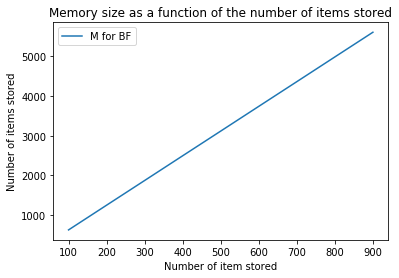

In [6]:
#Memory size as a function of the number of items stored#


itemn_storage=[]
length_storage=[]
for i in range(1,10):
    theta=1
    n = 100*i
    p= 0.05
    countbf= CBF(n,p,theta)
    itemn_storage.append(n)
    length_storage.append(countbf.length)


fig, ax = plt.subplots()
ax.plot(itemn_storage,length_storage, label="M for BF")
ax.set_xlabel('Number of item stored')
ax.set_ylabel('Number of items stored')
ax.set_title('Memory size as a function of the number of items stored')

leg = ax.legend();

In [7]:
#a function for creating random numbers 
import random
import string
def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

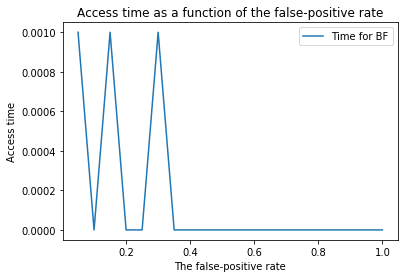

In [8]:
##Access time as a function of the false-positive rate.
#it depends on number of k used in my algorithm 

import time
storage=[]
runtime=[]
prop_storage=[]

for i in range(100):
    s = randomword(5)
    storage.append(s)
    
    
for i in range(1,21):
    p=0.05*i
    prop_storage.append(p)
    countbf= CBF(100,p,1)
    for item in storage:
        countbf.insert(item)
    a= time.time()
    for item in storage:
        countbf.search(item)
    b= time.time()
    runtime.append(round(b-a, 5))
                    
fig, ax = plt.subplots()                    
ax.plot(prop_storage,runtime, label="Time for BF")

ax.set_xlabel('The false-positive rate')
ax.set_ylabel('Access time')
ax.set_title('Access time as a function of the false-positive rate')

leg = ax.legend();

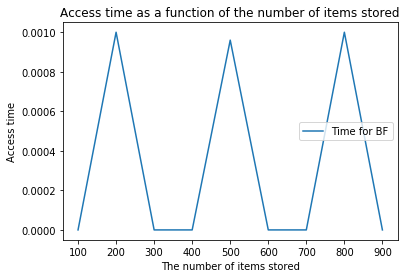

In [9]:
#Access time as a function of the number of items stored: 
##it depends on number of k used in my algorithm 

import time
storage=[]
runtime1=[]
length_storage=[]

for i in range(100):
    s = randomword(5)
    storage.append(s)
    
    
for i in range(1,10):
    n=100*i
    length_storage.append(n)
    countbf= CBF(n,0.05,1)
    for item in storage:
        countbf.insert(item)
    a= time.time()
    for item in storage:
        countbf.search(item)
    b= time.time()
    runtime1.append(round(b-a, 5))
                    
fig, ax = plt.subplots()                    
ax.plot(length_storage,runtime1, label="Time for BF")
ax.set_xlabel('The number of items stored')
ax.set_ylabel('Access time')
ax.set_title('Access time as a function of the number of items stored')

leg = ax.legend();

# **Task5**

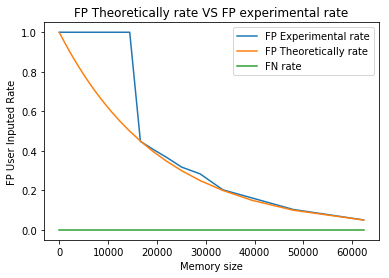

In [10]:
from random import shuffle 

added_word=[]
not_added_word=[]
prop_storage=[]
for i in range(10000):
    s = randomword(5)
    added_word.append(s)
    
for i in range(10000):
    s = randomword(5)
    not_added_word.append(s)

shuffle(added_word)
shuffle(not_added_word)
all_words = added_word + not_added_word
shuffle(all_words)


fp_list=[]
fn_list=[]
length_storage=[]
for i in range(1,21):
    fp_count=0   #false positive rate
    fn_count=0   #fasle negative rate
    
    p=0.05*i
    prop_storage.append(p)
    countbf= CBF(10000,p,1)
    
    for item in added_word:
        countbf.insert(item)
    
    for i in all_words: 
        if countbf.search(i): 
            if i in not_added_word: 
                fp_count+=1 
    else: 
        if i in added_word: 
            fn_count+=1
    fp_list.append(fp_count/10000)
    fn_list.append(fn_count/10000)
    length_storage.append(countbf.length)
fig, ax = plt.subplots()                    
ax.plot(length_storage,fp_list, label="FP Experimental rate")
ax.plot(length_storage,prop_storage, label="FP Theoretically rate")
ax.plot(length_storage,fn_list, label="FN rate")

ax.set_xlabel('Memory size')
ax.set_ylabel('FP User Inputed Rate')
ax.set_title('FP Theoretically rate VS FP experimental rate')

leg = ax.legend();

According to the graph, the FP Experimental rate matches the FP Theoretically rate for false-positive values smaller than 50%. As we increase the required FP to be more than 50%, we see that Experimental FP tends to be higher than the theoretical one and goes faster to produce a list with all false positive numbers.

In my opinion, this is because the Counting Bloom Filter doesn't have the optimal hash function that distributes all items uniformly and avoid collisions. Also, this happens due to the difficulty of choosing an array-size m that match the inputted p-value.

# **Task6**

According to the graph from Task 5, I can see that the algorithm tends to give higher False Positive rates compared to the theoretical one when we increase the FP inputted rate. I think this is due that my hash functions don't produce a 100% uniform distribution to decrease the collision rate. 

Also, I am assuming that the algorithm will give errors or produce inaccurate results when we increase the theta value. The reason behind that is that I am calculating the size of the array and the number of hash functions (m,k) using the equations of the standard bloom filter, not CBF, which can produce some errors in the extreme cases. 

To solve the problem and produce a better algorithm for all extreme cases, 

1- I can build a uniform and independent set of hash functions to minimize collisions as possible.

2- I can use computational tools to solve the equation between the probability of false-positive and the size of the array in the CBF algorithm. This method can help in choosing the optimal number of hash functions for any input to avoid collisions.

**Appendix**

audience: In the assignment, I put in my mind that I am talking to audiences that have experts and a general audience from the world-wide community. I believe I deserve a 4 as I  accurately used my knowledge of the general audiences' perspective to tailor my message and explanation in a subtle and sophisticated manner. I tailed my introduction to look like a Wikipedia page with specific sections and easy to understand explanations. I used simple examples to make it easy for the user to understand and visualize the concept of bloom filters in everyday uses. 


organization: I organized my written communication using an easy to understand organizational structure to deliver my message to my desired audience. I organized my code by having clear sections with comments, and I also used object-oriented programming to make it easier for the user to understand the concept behind bloom filters. I have also used latex to formulate the equations in analyzing and scaling the algorithm section to make it easier for the general user to read. 


critique: I have used critique in every part of the assignment. I have critiqued my way of writing in task2 and needed to go and read a couple of Wikipedia pages to be able to tail my explanation to the general audience. I have critiqued my implementation of CBF and wrote a function to calculate the real PF-rate only to compare it with my results and work on improving them. I also had critiqued my way of calculating the length of the array using the FP-probability rate and decided to use the equation from the standard BF to calculate the size length of CBF when I didn't find extreme differences that can affect my code results. I find critique an HC that I am frequently using to iterate my work and make it better and easier to read and reproduce. 

**References**

BBaqend. (n.d.). Baqend/Orestes-Bloomfilter. Retrieved from https://github.com/Baqend/Orestes-Bloomfilter#hash-functions.Bitly.

(2016, February 11). bitly/dablooms. Retrieved from https://github.com/bitly/dablooms.Bloom 

filter. (2019, November 2). Retrieved from https://en.wikipedia.org/wiki/Bloom_filter.Bloom

Filters - Introduction and Python Implementation. (2018, February 8). Retrieved from https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/.Counting

Bloom filter. (2019, July 29). Retrieved from https://en.wikipedia.org/wiki/Counting_Bloom_filter.Kim,

Kibeom, Jeong, Yongjo, Lee, Youngjoo, … Sunggu. (2019, July 11). Analysis of Counting Bloom Filters Used for Count Thresholding. Retrieved from https://www.mdpi.com/2079-9292/8/7/779/htm#B6-electronics-08-00779.Li,

Wei, Huang, Kun, Zhang, Dafang, … Zheng. (2013, July 29). Accurate Counting Bloom Filters for Large-Scale Data Processing. Retrieved from https://www.hindawi.com/journals/mpe/2013/516298/.